# Seaborn - Dados contínuos

Visualização de Dados Estatísticos

seaborn.pydata.org

Alguns métodos para visualizar a distribuição de conjuntos de dados

<ul>
    <li>distplot</li>
    <li>jointplot</li>
    <li>pairplot</li>
    <li>rugplot</li>
    <li>kdeplot</li>
</ul>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Distiplot

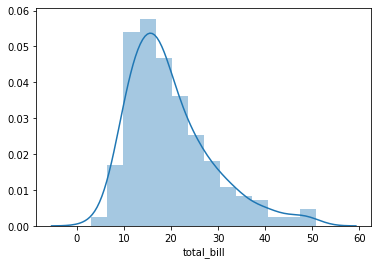

In [25]:
#Função que combina a funcao de histograma com a funcao de estimativa de densidade
sns.distplot(tips["total_bill"])

### JointPlot

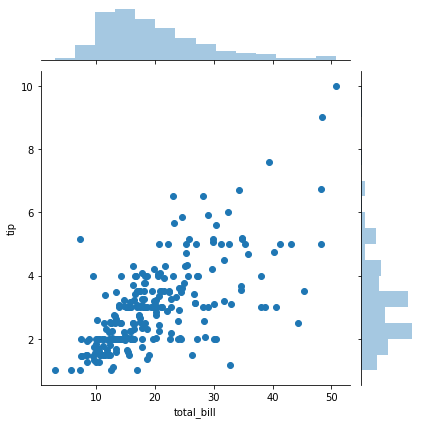

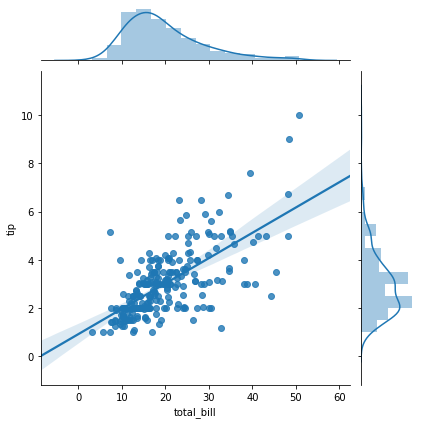

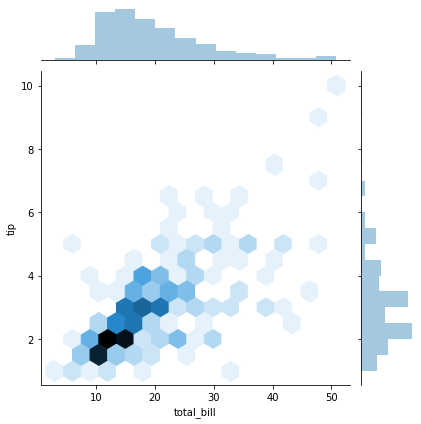

In [29]:
#Visualizando a distribuicao do dataset dados 2 variaveis. Diagrama de distribuição conjunta
## é criado histogramas de cada variavel e sua distibuicao no plano
sns.jointplot(x="total_bill", y="tip", data=tips)
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

### PairPlot

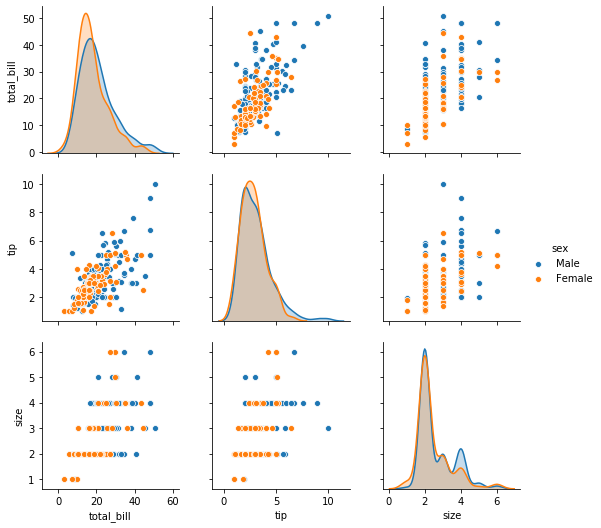

In [33]:
#comando que pega todas as variaveis numericas e faz jointplots de cada uma delas

# o hue da mais informação para os graficos, nesse casso mostrando a distribuicao pela classe
sns.pairplot(tips, hue="sex")

### RugPlot e KdePlot

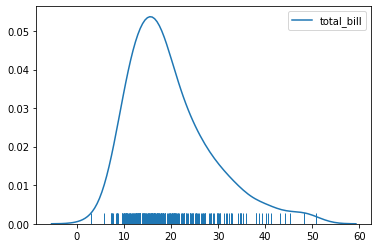

In [38]:
#cria um traço para cada dado
sns.rugplot(tips["total_bill"])

#soma das distribuições normais centradas nos dados extraidos pelo rugplot
sns.kdeplot(tips["total_bill"])

# Seaborn - Dados Categóricos

Principais métodos:

<ul>
    <li>factorplot</li>
    <li>boxplot</li>
    <li>violinplot</li>
    <li>stripplot</li>
    <li>swarmplot</li>
    <li>barplot</li>
    <li>countplot</li>
</ul>

In [45]:
import numpy as np

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Barplot

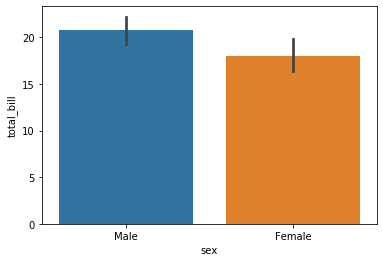

In [43]:
# mostra a media de um dado continuo em relacao a um dado categorico, junto com o seu desvio padrão
sns.barplot(x="sex", y="total_bill", data=tips)

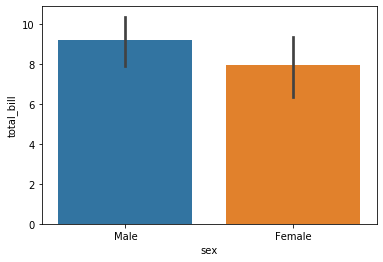

In [47]:
#no parametro estimator podemos passar qual será a funcao que sera executada sobre os dados
sns.barplot(x="sex", y="total_bill", data=tips, estimator=np.std)

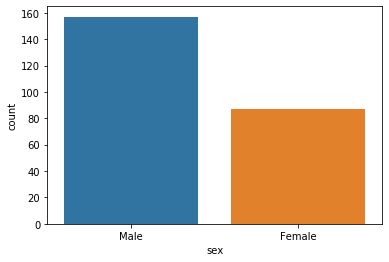

In [50]:
# contar  a quantidade de elementos de uma variavel categorica
sns.countplot(x="sex", data=tips)

### BoxPlot

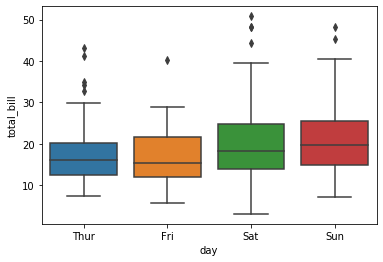

In [59]:
#sns.boxplot(x="day", y="total_bill", data=tips, hue="sex")
sns.boxplot(x="day", y="total_bill", data=tips)

Temos a mediana, a distancia InterQuartil onde estão 50% dos dados, o mínimo, o máximo e os outliers

### ViolinPlot

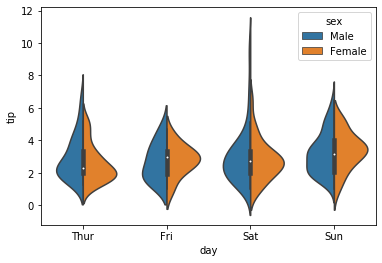

In [62]:
sns.violinplot(x="day", y="tip", data=tips, hue="sex",  split=True)

Vemos a distribuicao do conjunto continuo de acordo com o conjunto categorico

### StripPlot

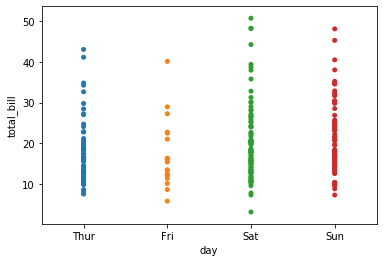

In [66]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=False)

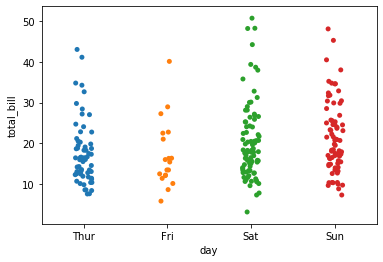

In [67]:
sns.stripplot(x="day", y="total_bill", data=tips)

### SwarmPlot

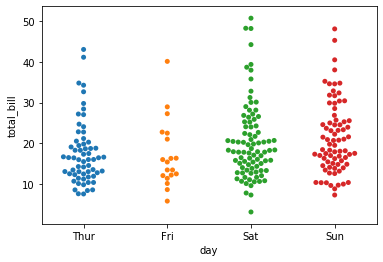

In [69]:
sns.swarmplot(x="day", y="total_bill", data=tips)

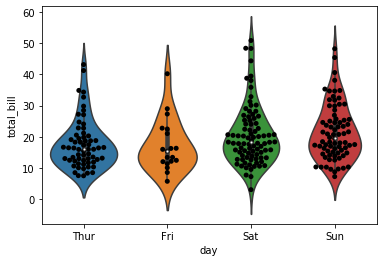

In [74]:
sns.swarmplot(x="day", y="total_bill", data=tips, color="black")
sns.violinplot(x="day", y="total_bill", data=tips)

### CatPlot

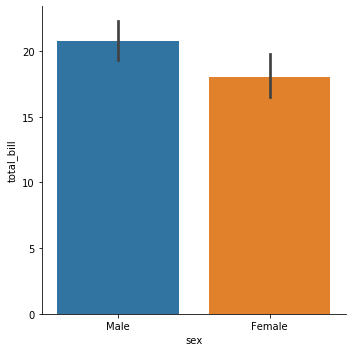

In [77]:
sns.catplot(x="sex", y="total_bill", data=tips, kind="bar")

# SeaBorn - Dados Matriciais

In [9]:
import pandas as pd
voos = pd.read_csv("flights.csv")
tips = sns.load_dataset("tips")

In [8]:
voos.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### HeatMap

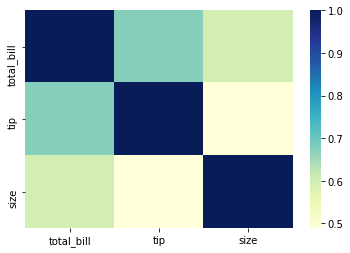

In [15]:
sns.heatmap(tips.corr(), cmap="YlGnBu")

In [17]:
#tabela dinâmica
pf = voos.pivot_table(values=["passengers"], index="month", columns="year")

In [18]:
pf

passengers                                                       
year            1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                      
April            129  135  163  181  235  227  269  313  348  348  396  461
August           148  170  199  242  272  293  347  405  467  505  559  606
December         118  140  166  194  201  229  278  306  336  337  405  432
February         118  126  150  180  196  188  233  277  301  318  342  391
January          112  115  145  171  196  204  242  284  315  340  360  417
July             148  170  199  230  264  302  364  413  465  491  548  622
June             135  149  178  218  243  264  315  374  422  435  472  535
March            132  141  178  193  236  235  267  317  356  362  406  419
May              121  125  172  183  229  234  270  318  355  363  420  472
November         104  114  146  172  180  203  237  271  305  310  362  390
October          119  133  162  191  211  229  274  306  347  359  407  461
September        136  158  184  209  237  259  312  355  404  404  463  508

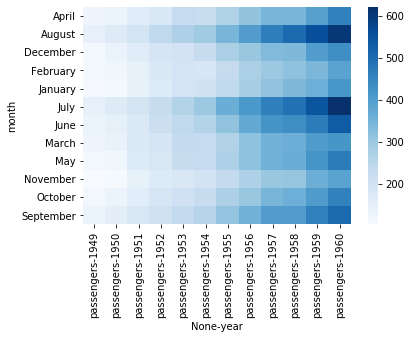

In [23]:
sns.heatmap(pf, cmap="Blues")

### Cluester Map

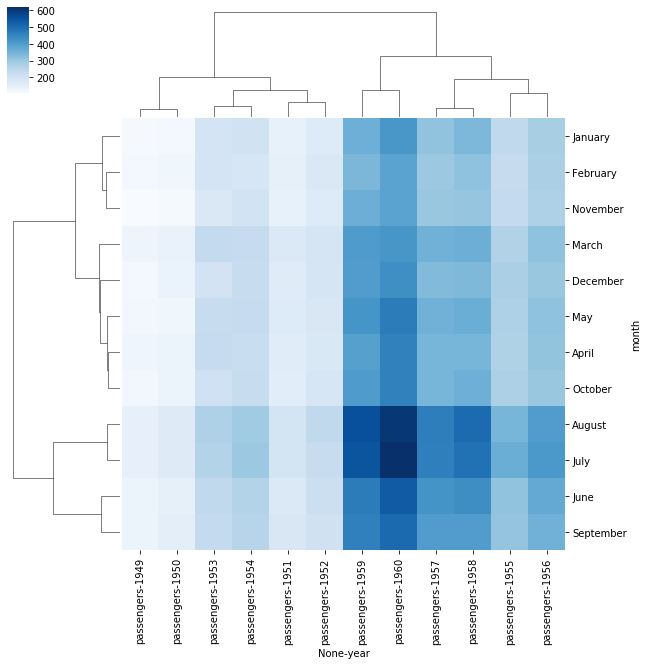

In [26]:
sns.clustermap(pf, cmap="Blues")

# SeaBorn - Plots de Regressão

### LmPlot

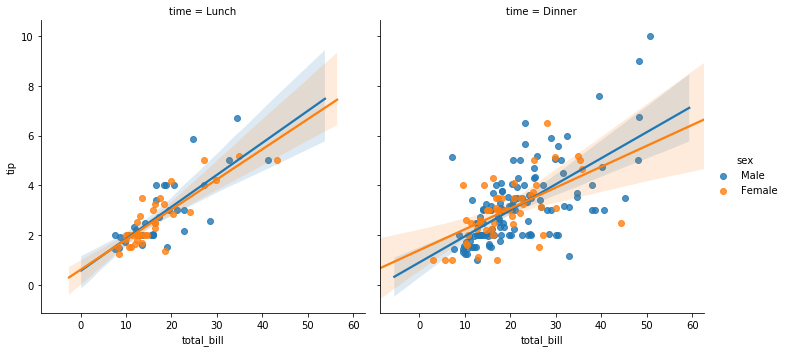

In [36]:
sns.lmplot(x = "total_bill", y="tip", data=tips, hue="sex", col="time")

# SeaBorn - PairGrids

In [42]:
iris = pd.read_csv("iris.csv")

In [44]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
iris["species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

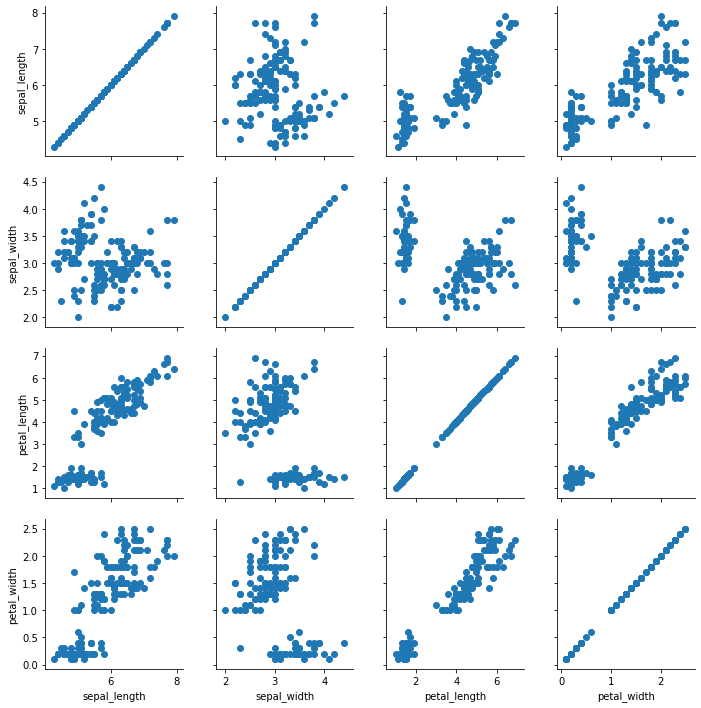

In [51]:
gd = sns.PairGrid(iris)

gd.map(plt.scatter)

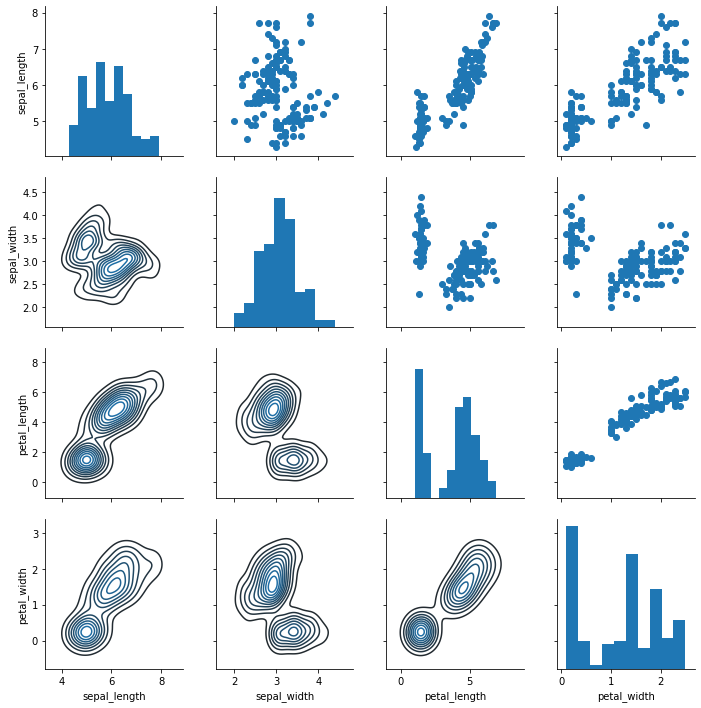

In [55]:
gd = sns.PairGrid(iris)

gd.map_diag(plt.hist)
gd.map_upper(plt.scatter)
gd.map_lower(sns.kdeplot)

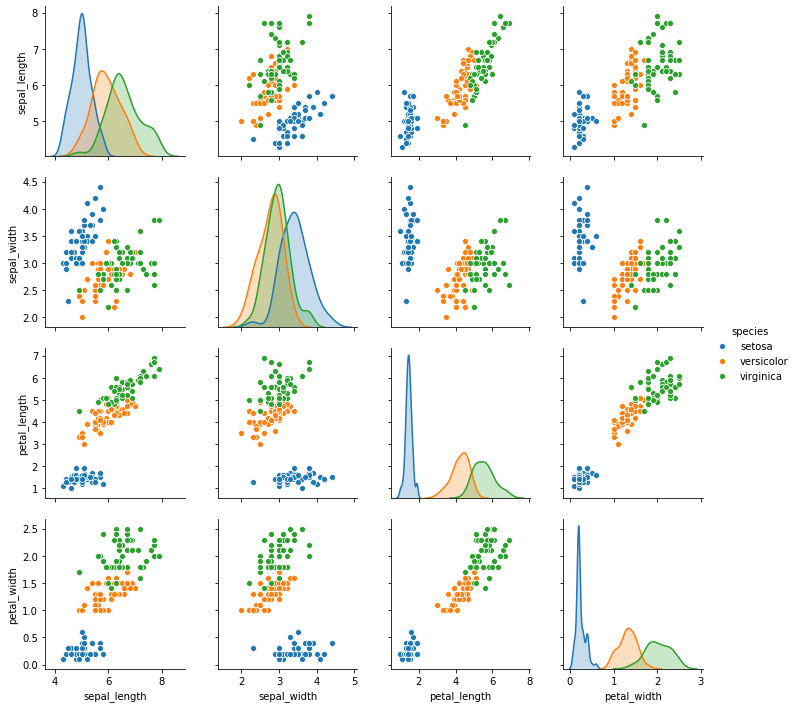

In [58]:
sns.pairplot(iris, hue="species")

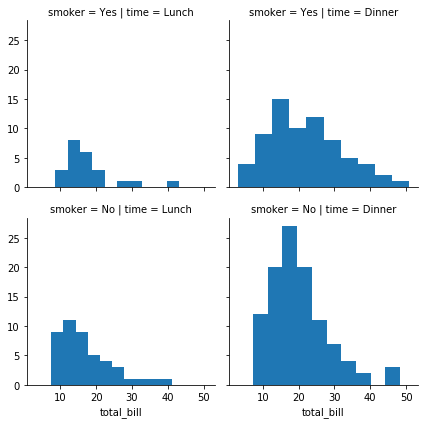

In [64]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map(plt.hist, "total_bill")